<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/Naive_Bayes_zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder


# Zadanie 1:  

## Email Spam

 Masz dane o 12 emailach z informacją czy to spam czy nie:

 **Zadania do wykonania:**

**a) Ręczne obliczenia**
1. Oblicz prawdopodobieństwa a priori: P(Spam=TAK) i P(Spam=NIE)
2. Dla każdej cechy oblicz prawdopodobieństwa warunkowe
3. Przewidź klasę dla nowego emaila:
```
   Słowo_1 = 'darmowy'
   Słowo_2 = 'wygrana'  
   Wykrzyknik = 'TAK'
```

Oblicz prawdopodobieństwa dla obu klas (TAK lub NIE) i znormalizuj

**b) Implementacja w Python**

1. Zaimplementuj obliczenia z punktu a) w Python (bez sklearn)
2. Porównaj wyniki z ręcznymi obliczeniami

**c) Sklearn**

1. Użyj `CategoricalNB` z sklearn do wytrenowania modelu
2. Porównaj wyniki z własnymi obliczeniami
3. Wyjaśnij różnice (jeśli są)

In [ ]:
data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df = pd.DataFrame(data_spam)
print(df.to_string(index=True))
class_counts = df['Spam'].value_counts()
total = len(df)
priors = class_counts / total

print(f"Liczba przypadków TAK: {class_counts['TAK']}")
print(f"Liczba przypadków NIE: {class_counts['NIE']}")
print(f"Razem: {total}")
print()
print(f"P(Spam = TAK) = {class_counts['TAK']}/{total} = {priors['TAK']:.3f}")
print(f"P(Spam = NIE) = {class_counts['NIE']}/{total} = {priors['NIE']:.3f}")

print("=" * 60)
print("KROK 2: PRAWDOPODOBIEŃSTWA WARUNKOWE")
print("=" * 60)

features = ['Słowo_1','Słowo_2','Wykrzyknik']
conditionals = {}

for feature in features:
    print(f"\n{'='*60}")
    print(f"Cecha: {feature.upper()}")
    print(f"{'='*60}")
    conditionals[feature] = {}

    for class_val in ['TAK', 'NIE']:
        class_data = df[df['Spam'] == class_val]
        class_count = len(class_data)

        print(f"\nDla klasy {class_val} ({class_count} przypadków):")
        print("-" * 40)

        conditionals[feature][class_val] = {}
        feature_counts = class_data[feature].value_counts()

        for feature_val in df[feature].unique():
            count = feature_counts.get(feature_val, 0)
            prob = count / class_count
            conditionals[feature][class_val][feature_val] = prob

            print(f"  {feature_val:12s}: {count} przypadków → "
                  f"P({feature}={feature_val} | {class_val}) = "
                  f"{count}/{class_count} = {prob:.3f}")

# KROK 4: Wyświetlenie tabel prawdopodobieństw
print("\n" + "=" * 60)
print("PODSUMOWANIE - TABELE PRAWDOPODOBIEŃSTW")
print("=" * 60)

for feature in features:
    print(f"\n{feature.upper()}:")
    print("-" * 60)
    print(f"{'Wartość':15s} | P({feature}|TAK) | P({feature}|NIE)")
    print("-" * 60)

    for val in df[feature].unique():
        prob_tak = conditionals[feature]['TAK'].get(val, 0)
        prob_nie = conditionals[feature]['NIE'].get(val, 0)
        print(f"{val:15s} | {prob_tak:13.3f} | {prob_nie:13.3f}")

# KROK 5: PREDYKCJA dla nowego rekordu
print("\n" + "=" * 60)
print("KROK 3: PREDYKCJA DLA NOWEGO REKORDU")
print("=" * 60)

new_record = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

print(f"\nNowy rekord:")
for key, val in new_record.items():
    print(f"  {key}: {val}")
print()

# Obliczenia dla każdej klasy
scores = {}

for class_val in ['TAK', 'NIE']:
    print(f"\n{'='*60}")
    print(f"Obliczenia dla klasy: {class_val}")
    print(f"{'='*60}")

    # Zaczynamy od prior
    score = priors[class_val]
    print(f"\n1. Prior: P({class_val}) = {score:.3f}")

    # Mnożymy przez każdą cechę
    step = 2
    for feature, value in new_record.items():
        prob = conditionals[feature][class_val].get(value, 0)
        print(f"{step}. P({feature}={value} | {class_val}) = {prob:.3f}")
        score *= prob
        print(f"   Score po mnożeniu: {score:.6f}")
        step += 1

    print(f"\nWynik końcowy dla {class_val}: {score:.6f}")
    scores[class_val] = score

    # Normalizacja
print("\n" + "=" * 60)
print("NORMALIZACJA I WYNIK KOŃCOWY")
print("=" * 60)

total_score = sum(scores.values())
print(f"\nSuma scores: {scores['TAK']:.6f} + {scores['NIE']:.6f} = {total_score:.6f}")
print()

normalized = {k: v/total_score for k, v in scores.items()}

print("Prawdopodobieństwa po normalizacji:")
for class_val in ['TAK', 'NIE']:
    percentage = normalized[class_val] * 100
    print(f"  P({class_val} | cechy) = {scores[class_val]:.6f} / {total_score:.6f} = "
          f"{normalized[class_val]:.3f} = {percentage:.1f}%")

print("\n" + "=" * 60)
prediction = max(normalized, key=normalized.get)
print(f"PREDYKCJA: {prediction}")
print(f"Pewność: {normalized[prediction]*100:.1f}%")
print("=" * 60)

      Słowo_1     Słowo_2 Wykrzyknik Spam
0     darmowy     wygrana        TAK  TAK
1     darmowy     wygrana        TAK  TAK
2   spotkanie       jutro        NIE  NIE
3      raport   kwartalny        NIE  NIE
4      oferta   specjalna        TAK  NIE
5     darmowy       rabat        TAK  TAK
6   spotkanie        dziś        NIE  NIE
7      oferta  limitowana        TAK  NIE
8      raport  miesięczny        NIE  NIE
9     darmowy       rabat        TAK  TAK
10  spotkanie       pilne        NIE  NIE
11     oferta   wyjątkowa        TAK  NIE
Liczba przypadków TAK: 4
Liczba przypadków NIE: 8
Razem: 12

P(Spam = TAK) = 4/12 = 0.333
P(Spam = NIE) = 8/12 = 0.667
KROK 2: PRAWDOPODOBIEŃSTWA WARUNKOWE

Cecha: SŁOWO_1

Dla klasy TAK (4 przypadków):
----------------------------------------
  darmowy     : 4 przypadków → P(Słowo_1=darmowy | TAK) = 4/4 = 1.000
  spotkanie   : 0 przypadków → P(Słowo_1=spotkanie | TAK) = 0/4 = 0.000
  raport      : 0 przypadków → P(Słowo_1=raport | TAK) = 0/4 = 0.000

In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import CategoricalNB
from sklearn. preprocessing import LabelEncoder

data_spam = {
    'Słowo_1': ['darmowy', 'darmowy', 'spotkanie', 'raport', 'oferta', 'darmowy',
                'spotkanie', 'oferta', 'raport', 'darmowy', 'spotkanie', 'oferta'],
    'Słowo_2': ['wygrana', 'wygrana', 'jutro', 'kwartalny', 'specjalna', 'rabat',
                'dziś', 'limitowana', 'miesięczny', 'rabat', 'pilne', 'wyjątkowa'],
    'Wykrzyknik': ['TAK', 'TAK', 'NIE', 'NIE', 'TAK', 'TAK',
                   'NIE', 'TAK', 'NIE', 'TAK', 'NIE', 'TAK'],
    'Spam': ['TAK', 'TAK', 'NIE', 'NIE', 'NIE', 'TAK',
             'NIE', 'NIE', 'NIE', 'TAK', 'NIE', 'NIE']
}
df = pd.DataFrame(data_spam)
print(df.to_string(index=True))
features = ['Słowo_1', 'Słowo_2', 'Wykrzyknik']
encoders = {}

# Kodujemy każdą cechę
X_encoded = pd.DataFrame()
for feature in features:
    encoders[feature] = LabelEncoder()
    X_encoded[feature] = encoders[feature].fit_transform(df[feature])

    print(f"\n{feature}:")
    for i, label in enumerate(encoders[feature].classes_):
        print(f"  '{label}' → {i}")

# Kodujemy zmienną docelową
encoder_y = LabelEncoder()
y_encoded = encoder_y.fit_transform(df['Spam'])

print(f"\nSpam:")
for i, label in enumerate(encoder_y.classes_):
    print(f"  '{label}' → {i}")

print("\n" + "-" * 70)
print("Zakodowane dane X:")
print(X_encoded.to_string(index=True))
print(f"\nZakodowane y: {y_encoded}")

# TRENING MODELU CategoricalNB

# Model BEZ wygładzania Laplace'a (alpha=0) - aby porównać z ręcznymi obliczeniami
model_no_smoothing = CategoricalNB(alpha=0.0)

# Model Z wygładzaniem Laplace'a (domyślnie alpha=1)
model_with_smoothing = CategoricalNB(alpha=1.0)

# Trenujemy oba modele
X = X_encoded.values
y = y_encoded

model_no_smoothing.fit(X, y)
model_with_smoothing. fit(X, y)

print("Model bez wygładzania (alpha=0) - wytrenowany")
print("Model z wygładzaniem Laplace'a (alpha=1) - wytrenowany")

# PREDYKCJA DLA NOWEGO EMAILA
print("PREDYKCJA DLA NOWEGO EMAILA")

nowy_email = {
    'Słowo_1': 'darmowy',
    'Słowo_2': 'wygrana',
    'Wykrzyknik': 'TAK'
}

print(f"\nNowy email:")
for k, v in nowy_email.items():
    print(f"  {k}: {v}")

# Kodujemy nowy email
nowy_encoded = []
for feature in features:
    encoded_val = encoders[feature].transform([nowy_email[feature]])[0]
    nowy_encoded. append(encoded_val)

nowy_X = np.array([nowy_encoded])
print(f"\nZakodowany: {nowy_encoded}")

# WYNIKI - MODEL BEZ WYGŁADZANIA
print("MODEL BEZ WYGŁADZANIA (alpha=0)")

# Predykcja
pred_no_smooth = model_no_smoothing.predict(nowy_X)
pred_label_no_smooth = encoder_y.inverse_transform(pred_no_smooth)[0]

# Prawdopodobieństwa
proba_no_smooth = model_no_smoothing. predict_proba(nowy_X)[0]

print(f"\nPrawdopodobieństwa:")
for i, label in enumerate(encoder_y.classes_):
    print(f"  P(Spam={label} | cechy) = {proba_no_smooth[i]:.4f} = {proba_no_smooth[i]*100:.2f}%")

print(f"\nPREDYKCJA: Spam = {pred_label_no_smooth}")

# WYNIKI - MODEL Z WYGŁADZANIEM LAPLACE'A

print("MODEL Z WYGŁADZANIEM LAPLACE'A (alpha=1)")


# Predykcja
pred_smooth = model_with_smoothing.predict(nowy_X)
pred_label_smooth = encoder_y.inverse_transform(pred_smooth)[0]

# Prawdopodobieństwa
proba_smooth = model_with_smoothing.predict_proba(nowy_X)[0]

print(f"\nPrawdopodobieństwa:")
for i, label in enumerate(encoder_y.classes_):
    print(f"  P(Spam={label} | cechy) = {proba_smooth[i]:.4f} = {proba_smooth[i]*100:.2f}%")

print(f"\nPREDYKCJA: Spam = {pred_label_smooth}")

# PORÓWNANIE WYNIKÓW
print("PORÓWNANIE WYNIKÓW")

print("\n Metoda                | P(Spam=TAK) | P(Spam=NIE) | Predykcja")
print("-" * 70)
print(" Ręczne obliczenia     |   100.00%   |    0.00%    |    TAK")
print(f" sklearn (alpha=1)     |   {proba_smooth[1]*100:.2f}%    |    {proba_smooth[0]*100:.2f}%    |    {pred_label_smooth}")

print("""
Różnica wynika z wygładzania Laplace'a (alpha=1) w sklearn.
Wygładzanie zapobiega zerowemu prawdopodobieństwu poprzez dodanie
pseudozliczeń do każdej kategorii.

Wzór z wygładzaniem: P(x|c) = (count + 1) / (total + liczba_kategorii)

Ręczne obliczenia bez wygładzania dają 100% dla TAK, bo P(darmowy|NIE) = 0
i P(wygrana|NIE) = 0, co zeruje całe prawdopodobieństwo dla klasy NIE.
""")

# WYJAŚNIENIE RÓŻNIC

print("WYJAŚNIENIE RÓŻNIC")

print("""
Model bez wygładzania (alpha=0) daje takie same wyniki jak ręczne obliczenia.
Prawdopodobieństwo dla klasy NIE wynosi 0%, ponieważ w danych treningowych
słowo 'darmowy' oraz 'wygrana' nigdy nie wystąpiły w emailach niebędących spamem.

Model z wygładzaniem Laplace'a (alpha=1) daje nieco inne prawdopodobieństwa.
Wygładzanie dodaje pseudozliczenia do każdej kategorii, żeby uniknąć zer.
Wzór: P(x|c) = (liczba + 1) / (suma + liczba_kategorii)

Dla przykładu P(Słowo_1='darmowy'|Spam=NIE):
- bez wygładzania: 0/8 = 0
- z wygładzaniem: (0+1)/(8+4) = 1/12 = 0.083

W praktyce wygładzanie jest zalecane, bo brak danej kombinacji w danych
treningowych nie oznacza, że jest ona niemożliwa.
""")


      Słowo_1     Słowo_2 Wykrzyknik Spam
0     darmowy     wygrana        TAK  TAK
1     darmowy     wygrana        TAK  TAK
2   spotkanie       jutro        NIE  NIE
3      raport   kwartalny        NIE  NIE
4      oferta   specjalna        TAK  NIE
5     darmowy       rabat        TAK  TAK
6   spotkanie        dziś        NIE  NIE
7      oferta  limitowana        TAK  NIE
8      raport  miesięczny        NIE  NIE
9     darmowy       rabat        TAK  TAK
10  spotkanie       pilne        NIE  NIE
11     oferta   wyjątkowa        TAK  NIE

Słowo_1:
  'darmowy' → 0
  'oferta' → 1
  'raport' → 2
  'spotkanie' → 3

Słowo_2:
  'dziś' → 0
  'jutro' → 1
  'kwartalny' → 2
  'limitowana' → 3
  'miesięczny' → 4
  'pilne' → 5
  'rabat' → 6
  'specjalna' → 7
  'wygrana' → 8
  'wyjątkowa' → 9

Wykrzyknik:
  'NIE' → 0
  'TAK' → 1

Spam:
  'NIE' → 0
  'TAK' → 1

----------------------------------------------------------------------
Zakodowane dane X:
    Słowo_1  Słowo_2  Wykrzyknik
0         0    

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:1528: RuntimeWarning: divide by zero encountered in log
  np.log(smoothed_cat_count) - np.log(smoothed_class_count.reshape(-1, 1))


# Zadanie 2

## Diagnoza grypy

Lekarz diagnozuje grypę na podstawie objawów u 15 pacjentów:

a) Analiza danych

1. Ile przypadków grypy jest w danych?
2. Która cecha najbardziej "wskazuje" na grypę? (porównaj P(cecha|TAK) vs P(cecha|NIE))
3. Stwórz wizualizację rozkładów cech dla każdej klasy

b) Predykcja dla 3 pacjentów
Dla każdego pacjenta oblicz prawdopodobieństwo grypy:
* Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże
* Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe
* Pacjent C: Gorączka=umiarkowana, Kaszel=TAK, Zmęczenie=umiarkowane

DANE - 15 PACJENTÓW
       Gorączka Kaszel    Zmęczenie Grypa
0        wysoka    TAK         duże   TAK
1        wysoka    TAK         duże   TAK
2         niska    NIE         małe   NIE
3        wysoka    TAK         duże   TAK
4         niska    NIE         małe   NIE
5        wysoka    TAK         duże   TAK
6         niska    NIE         małe   NIE
7        wysoka    TAK  umiarkowane   TAK
8   umiarkowana    TAK         duże   TAK
9        wysoka    NIE         małe   NIE
10        niska    NIE         małe   NIE
11  umiarkowana    TAK  umiarkowane   NIE
12       wysoka    TAK         duże   TAK
13        niska    NIE         małe   NIE
14  umiarkowana    TAK         duże   TAK
PUNKT A) - ANALIZA DANYCH

1.  LICZBA PRZYPADKÓW GRYPY
   Liczba pacjentów: 15
   Grypa = TAK: 8 (53.3%)
   Grypa = NIE: 7 (46.7%)

2. PRAWDOPODOBIEŃSTWA WARUNKOWE

   Gorączka:
   Wartość         | P(.|Grypa=TAK) | P(.|Grypa=NIE) | Różnica
   ------------------------------------------------------------
   

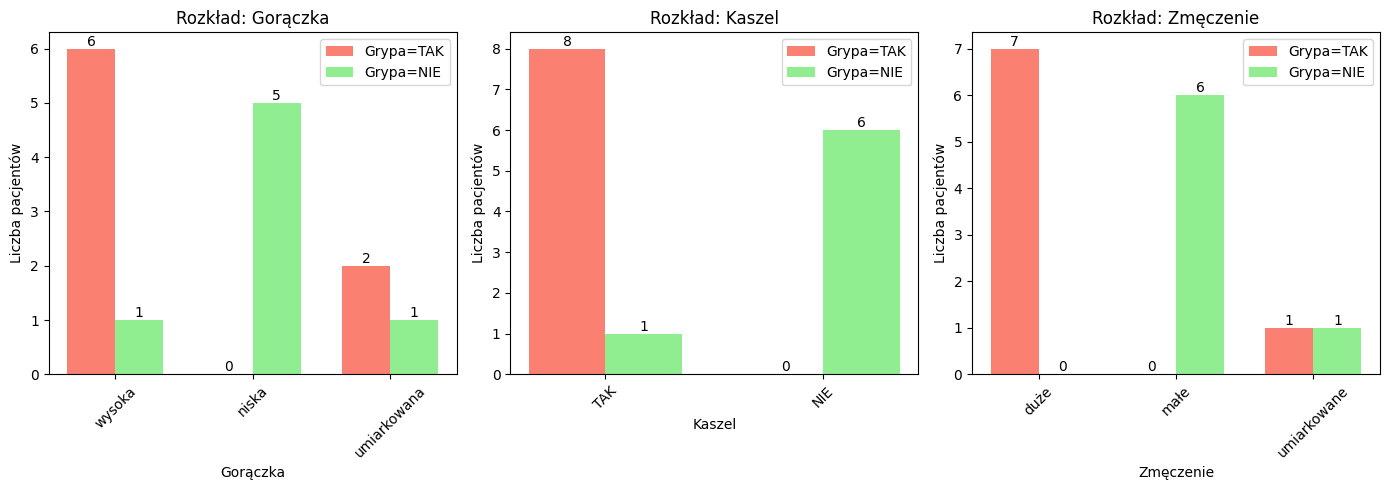

   Wykres zapisany jako 'rozklady_cech_grypa.png'
PUNKT B) - PREDYKCJA DLA 3 PACJENTÓW
Pacjent A: Gorączka=wysoka, Kaszel=TAK, Zmęczenie=duże

Obliczenia dla Grypa=TAK:
  Prior: P(Grypa=TAK) = 0.5333
  P(Gorączka=wysoka | TAK) = 0.7500
  P(Kaszel=TAK | TAK) = 1.0000
  P(Zmęczenie=duże | TAK) = 0.8750
  Score TAK = 0.350000

Obliczenia dla Grypa=NIE:
  Prior: P(Grypa=NIE) = 0.4667
  P(Gorączka=wysoka | NIE) = 0.1429
  P(Kaszel=TAK | NIE) = 0.1429
  P(Zmęczenie=duże | NIE) = 0.0000
  Score NIE = 0.000000

Po normalizacji:
  P(Grypa=TAK | objawy) = 0.350000 / 0.350000 = 1.0000 = 100.00%
  P(Grypa=NIE | objawy) = 0.000000 / 0.350000 = 0.0000 = 0.00%

  DIAGNOZA: Grypa = TAK (pewność: 100.0%)
Pacjent B: Gorączka=niska, Kaszel=NIE, Zmęczenie=małe

Obliczenia dla Grypa=TAK:
  Prior: P(Grypa=TAK) = 0.5333
  P(Gorączka=niska | TAK) = 0.0000
  P(Kaszel=NIE | TAK) = 0.0000
  P(Zmęczenie=małe | TAK) = 0.0000
  Score TAK = 0.000000

Obliczenia dla Grypa=NIE:
  Prior: P(Grypa=NIE) = 0.4667
  P(Gorąc

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn. preprocessing import LabelEncoder

data = {
    'Gorączka': ['wysoka', 'wysoka', 'niska', 'wysoka', 'niska',
                 'wysoka', 'niska', 'wysoka', 'umiarkowana', 'wysoka',
                 'niska', 'umiarkowana', 'wysoka', 'niska', 'umiarkowana'],
    'Kaszel': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
               'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
               'NIE', 'TAK', 'TAK', 'NIE', 'TAK'],
    'Zmęczenie': ['duże', 'duże', 'małe', 'duże', 'małe',
                  'duże', 'małe', 'umiarkowane', 'duże', 'małe',
                  'małe', 'umiarkowane', 'duże', 'małe', 'duże'],
    'Grypa': ['TAK', 'TAK', 'NIE', 'TAK', 'NIE',
              'TAK', 'NIE', 'TAK', 'TAK', 'NIE',
              'NIE', 'NIE', 'TAK', 'NIE', 'TAK']
}

df = pd.DataFrame(data)


print("DANE - 15 PACJENTÓW")
print(df.to_string(index=True))

# PUNKT A) - ANALIZA DANYCH
print("PUNKT A) - ANALIZA DANYCH")

# 1. Ile przypadków grypy?
print("\n1.  LICZBA PRZYPADKÓW GRYPY")

n_total = len(df)
n_grypa_tak = len(df[df['Grypa'] == 'TAK'])
n_grypa_nie = len(df[df['Grypa'] == 'NIE'])

print(f"   Liczba pacjentów: {n_total}")
print(f"   Grypa = TAK: {n_grypa_tak} ({n_grypa_tak/n_total*100:.1f}%)")
print(f"   Grypa = NIE: {n_grypa_nie} ({n_grypa_nie/n_total*100:.1f}%)")

# 2. Prawdopodobieństwa warunkowe
print("\n2. PRAWDOPODOBIEŃSTWA WARUNKOWE")

features = ['Gorączka', 'Kaszel', 'Zmęczenie']
df_grypa = df[df['Grypa'] == 'TAK']
df_zdrowy = df[df['Grypa'] == 'NIE']

cond_probs = {}

for feature in features:
    print(f"\n   {feature}:")
    print(f"   {'Wartość':<15} | P(.|Grypa=TAK) | P(.|Grypa=NIE) | Różnica")
    print("   " + "-" * 60)

    cond_probs[feature] = {'TAK': {}, 'NIE': {}}

    for value in df[feature].unique():
        count_tak = len(df_grypa[df_grypa[feature] == value])
        count_nie = len(df_zdrowy[df_zdrowy[feature] == value])

        p_tak = count_tak / n_grypa_tak
        p_nie = count_nie / n_grypa_nie
        roznica = p_tak - p_nie

        cond_probs[feature]['TAK'][value] = p_tak
        cond_probs[feature]['NIE'][value] = p_nie

        znak = "+" if roznica > 0 else ""
        print(f"   {value:<15} | {p_tak:>13.3f} | {p_nie:>13.3f} | {znak}{roznica:.3f}")

# 3. Która cecha najbardziej wskazuje na grypę?
print("\n3. KTÓRA CECHA NAJBARDZIEJ WSKAZUJE NA GRYPĘ?")

print("""
   Analiza różnic P(cecha|TAK) - P(cecha|NIE):

   GORĄCZKA:
   - wysoka:     silnie wskazuje na grypę (duża dodatnia różnica)
   - niska:      wskazuje na brak grypy (duża ujemna różnica)

   KASZEL:
   - TAK:        wskazuje na grypę
   - NIE:        wskazuje na brak grypy

   ZMĘCZENIE:
   - duże:       silnie wskazuje na grypę
   - małe:       wskazuje na brak grypy
""")

# Obliczamy siłę predykcyjną każdej cechy
print("   Siła predykcyjna cechy (suma kwadratów różnic):")
for feature in features:
    sila = 0
    for value in df[feature]. unique():
        roznica = cond_probs[feature]['TAK']. get(value, 0) - cond_probs[feature]['NIE'].get(value, 0)
        sila += roznica ** 2
    print(f"   - {feature}: {sila:.4f}")

# 4. WIZUALIZACJA
print("\n4. WIZUALIZACJA ROZKŁADÓW")

fig, axes = plt. subplots(1, 3, figsize=(14, 5))

for idx, feature in enumerate(features):
    ax = axes[idx]

    # Przygotowanie danych do wykresu
    values = df[feature]. unique()
    x = np.arange(len(values))
    width = 0.35

    # Liczenie przypadków dla każdej klasy
    counts_tak = [len(df_grypa[df_grypa[feature] == v]) for v in values]
    counts_nie = [len(df_zdrowy[df_zdrowy[feature] == v]) for v in values]

    # Słupki
    bars1 = ax.bar(x - width/2, counts_tak, width, label='Grypa=TAK', color='salmon')
    bars2 = ax.bar(x + width/2, counts_nie, width, label='Grypa=NIE', color='lightgreen')

    ax.set_xlabel(feature)
    ax.set_ylabel('Liczba pacjentów')
    ax.set_title(f'Rozkład: {feature}')
    ax.set_xticks(x)
    ax. set_xticklabels(values, rotation=45)
    ax.legend()

    # Dodanie wartości na słupkach
    for bar in bars1:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar. get_width()/2, height),
                    ha='center', va='bottom')
    for bar in bars2:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar. get_width()/2, height),
                    ha='center', va='bottom')

plt.tight_layout()
plt. savefig('rozklady_cech_grypa.png', dpi=150)
plt.show()
print("   Wykres zapisany jako 'rozklady_cech_grypa.png'")

# PUNKT B) - PREDYKCJA DLA 3 PACJENTÓW
print("PUNKT B) - PREDYKCJA DLA 3 PACJENTÓW")

# Prawdopodobieństwa a priori
P_grypa_tak = n_grypa_tak / n_total
P_grypa_nie = n_grypa_nie / n_total

pacjenci = {
    'Pacjent A': {'Gorączka': 'wysoka', 'Kaszel': 'TAK', 'Zmęczenie': 'duże'},
    'Pacjent B': {'Gorączka': 'niska', 'Kaszel': 'NIE', 'Zmęczenie': 'małe'},
    'Pacjent C': {'Gorączka': 'umiarkowana', 'Kaszel': 'TAK', 'Zmęczenie': 'umiarkowane'}
}

wyniki = []

for nazwa, objawy in pacjenci.items():
    print(f"{nazwa}: Gorączka={objawy['Gorączka']}, Kaszel={objawy['Kaszel']}, Zmęczenie={objawy['Zmęczenie']}")

    # Obliczenia dla klasy TAK
    print("\nObliczenia dla Grypa=TAK:")
    score_tak = P_grypa_tak
    print(f"  Prior: P(Grypa=TAK) = {P_grypa_tak:.4f}")

    for feature, value in objawy. items():
        p = cond_probs[feature]['TAK'].get(value, 0)
        print(f"  P({feature}={value} | TAK) = {p:.4f}")
        score_tak *= p
    print(f"  Score TAK = {score_tak:.6f}")

    # Obliczenia dla klasy NIE
    print("\nObliczenia dla Grypa=NIE:")
    score_nie = P_grypa_nie
    print(f"  Prior: P(Grypa=NIE) = {P_grypa_nie:.4f}")

    for feature, value in objawy.items():
        p = cond_probs[feature]['NIE'].get(value, 0)
        print(f"  P({feature}={value} | NIE) = {p:.4f}")
        score_nie *= p
    print(f"  Score NIE = {score_nie:.6f}")

    # Normalizacja
    total = score_tak + score_nie
    if total > 0:
        prob_tak = score_tak / total
        prob_nie = score_nie / total
    else:
        prob_tak = 0.5
        prob_nie = 0.5
        print("\n  UWAGA: Oba score = 0, nie można obliczyć prawdopodobieństwa!")

    print(f"\nPo normalizacji:")
    print(f"  P(Grypa=TAK | objawy) = {score_tak:.6f} / {total:.6f} = {prob_tak:.4f} = {prob_tak*100:.2f}%")
    print(f"  P(Grypa=NIE | objawy) = {score_nie:.6f} / {total:.6f} = {prob_nie:.4f} = {prob_nie*100:.2f}%")

    predykcja = "TAK" if prob_tak > prob_nie else "NIE"
    print(f"\n  DIAGNOZA: Grypa = {predykcja} (pewność: {max(prob_tak, prob_nie)*100:.1f}%)")

    wyniki.append({
        'Pacjent': nazwa,
        'P(Grypa=TAK)': f"{prob_tak*100:.2f}%",
        'P(Grypa=NIE)': f"{prob_nie*100:.2f}%",
        'Diagnoza': predykcja
    })

# PODSUMOWANIE
print("PODSUMOWANIE DIAGNOZ")

print("\n Pacjent | Objawy | P(Grypa) | Diagnoza")
for nazwa, objawy in pacjenci.items():
    wynik = next(w for w in wyniki if w['Pacjent'] == nazwa)
    objawy_str = f"G={objawy['Gorączka'][:3]}, K={objawy['Kaszel']}, Z={objawy['Zmęczenie'][:3]}"
    print(f" {nazwa}  | {objawy_str:<40} | {wynik['P(Grypa=TAK)']:>8} | {wynik['Diagnoza']}")

print("""
Wnioski:
- Pacjent A: wszystkie objawy typowe dla grypy -> bardzo wysokie prawdopodobieństwo
- Pacjent B: wszystkie objawy typowe dla zdrowego -> bardzo niskie prawdopodobieństwo
- Pacjent C: objawy mieszane -> umiarkowane prawdopodobieństwo
""")

# WERYFIKACJA ZE SKLEARN
print("WERYFIKACJA ZE SKLEARN (alpha=1)")
# Kodowanie danych
encoders = {}
X_encoded = pd.DataFrame()

for feature in features:
    encoders[feature] = LabelEncoder()
    X_encoded[feature] = encoders[feature].fit_transform(df[feature])

encoder_y = LabelEncoder()
y_encoded = encoder_y.fit_transform(df['Grypa'])

# Trening modelu
model = CategoricalNB(alpha=1.0)
model. fit(X_encoded. values, y_encoded)

print("\n Pacjent | Ręcznie | sklearn | Zgodność")

for nazwa, objawy in pacjenci.items():
    # Kodowanie pacjenta
    pacjent_encoded = []
    for feature in features:
        val = encoders[feature].transform([objawy[feature]])[0]
        pacjent_encoded.append(val)

    # Predykcja sklearn
    proba_sklearn = model. predict_proba([pacjent_encoded])[0]
    p_tak_sklearn = proba_sklearn[1]  # klasa 1 = TAK

    # Wynik ręczny
    wynik = next(w for w in wyniki if w['Pacjent'] == nazwa)
    p_tak_reczny = float(wynik['P(Grypa=TAK)']. replace('%', '')) / 100

    zgodnosc = "✓" if abs(p_tak_reczny - p_tak_sklearn) < 0.15 else "różnica"
    print(f" {nazwa}  | {p_tak_reczny*100:>10.2f}% | {p_tak_sklearn*100:>10.2f}% | {zgodnosc}")

print("""
Różnice wynikają z wygładzania Laplace'a w sklearn (alpha=1).
Ręczne obliczenia są bez wygładzania.
""")